<a href="https://colab.research.google.com/github/JuanPabloJP/Data-visualization/blob/main/3%20Interpolation/interpoation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Visualization: Image procesing & interpolation
**Juan Pablo Hernández Lozano**

## Parte 1: Procesamiento e interpolación

### 0.1. Rango de valores en una imagen

La imagen ".raw"de tamaño 485 x 485 (tipo de datos float64) tiene detalles que no se observan
fácilmente. Cambie el rango en el que se despliegan algunos valores de la imagen (aquellos que hacen parte de
los detalles ocultos). Puede usar el histograma de la imagen para explorar dicho rango de valores.

In [15]:
import matplotlib.pyplot as plt 

In [16]:
img = np.fromfile("phantom.raw")

In [17]:
len(img)

235225

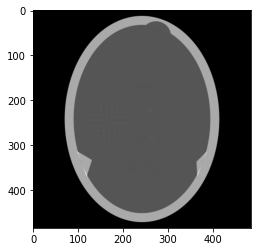

In [18]:
plt.imshow(img.reshape(485,485),cmap='gray')

Histograma para observar como se distribuyen los contrastes de la imagen:

(array([1.1081e+05, 2.1600e+02, 1.5600e+02, 9.9432e+04, 5.2000e+02,
        5.3700e+02, 2.3443e+04, 5.9000e+01, 2.6000e+01, 2.6000e+01]),
 array([0.        , 0.06264521, 0.12529042, 0.18793563, 0.25058084,
        0.31322604, 0.37587125, 0.43851646, 0.50116167, 0.56380688,
        0.62645209]),
 <a list of 10 Patch objects>)

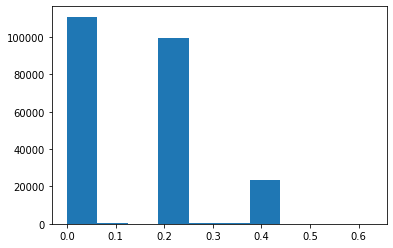

In [19]:
plt.hist(img)

Se mapean las zonas de menor contraste a una representación mayor:

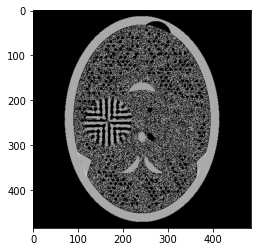

In [20]:
copia  = img.copy()
for i in range(len(copia)):
    if copia[i] < 0.39 and copia[i] > 0.21 :
        copia[i] = 0.00
    if copia[i] > 0.19 and copia[i] < 0.21:
        copia[i] = 0.40

plt.imshow(copia.reshape(485,485),cmap='gray')

# Parte 2: Datos faltantes e interpolación

- Haga la lectura de la imagen (diferente a la incluida en los ejemplos). Para los pasos posteriores puede usar la imagen en escala de grises

In [21]:
import cv2

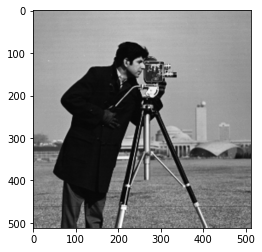

In [22]:
img2 = cv2.imread("cameraman.tif")
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2, cmap='gray')
plt.show()

- Construya una o varias funciones que permitan usar esquemas "baratos"de interpolación
(interpolación lineal e interpolación bilineal)

In [23]:
def interpolacion_lineal(y0,x0, y1,x1, x):
    l = (x-x0) / (x1-x0)
    return y0*(1-l) + y1*l


- Construya una función que permita escalar la imagen al tamaño que usted elija (usando las
funciones construidas en el punto anterior)

In [24]:

def zoom_image(im, zoom):
    zx = im.shape[0]*zoom
    zy = im.shape[1]*zoom
    out = np.zeros((zx,zy))
    x = np.arange(0,im.shape[0]+1,1)*zoom
    y = np.arange(0,im.shape[1]+1,1)*zoom

    for i,v in enumerate(out):
        y0_idx = np.argmax(y >i) - 1
        for j,_ in enumerate(v):

            x0_idx = np.argmax(x > j) - 1
            x1_idx = np.argmax(j < x) 

            x0 = x[x0_idx]
            x1 = x[x1_idx]

            y0 = im[y0_idx, x0_idx - 1]
            y1 = im[y0_idx, x1_idx - 1]

            out[i,j] = interpolacion_lineal(y0, x0, y1, x1, j)
    return out   


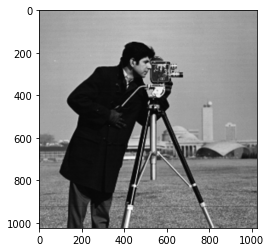

In [25]:
zimg = zoom_image(img2, 2)
plt.imshow(zimg, cmap='gray')
plt.show() 

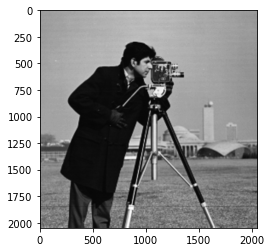

In [26]:
zimg = zoom_image(img2, 4)
plt.imshow(zimg, cmap='gray')
plt.show()

- Construya una función que le permita "hacer zoom.a una región de la imagen (no necesariamente la región de la imagen debe ser elejida de forma interactiva, las coordenadas de la región a la quiere hacer zoom pueden ser parámetros de entrada de la función)

In [27]:
def zoom_area(im,xcut,ycut, zoom = 2):
    a,b = xcut
    u,v = ycut

    area = im[a:b,u:v]

    return zoom_image(area,zoom)


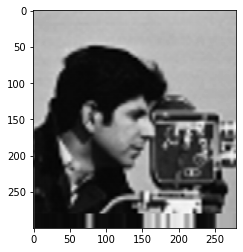

In [28]:
xcut = (50,200)
ycut = (180,320)
z_area = zoom_area(img2, xcut, ycut, 2)
plt.imshow(z_area, cmap='gray')
plt.show()